In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Escaladores
from sklearn.preprocessing import StandardScaler

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.ensemble import RandomForestClassifier

# Metricas
from sklearn.metrics import confusion_matrix, classification_report

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = datasets.load_iris()

df = pd.DataFrame(data=data.data, columns=data.feature_names)
df["target"] = data.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
x = df.drop("target", axis=1)
y = df["target"]


In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

x_plot = x_train.copy()

In [5]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [21]:
lda = LDA(n_components=2)
x_train_lda = lda.fit_transform(x_train, y_train)
x_test_lda = lda.transform(x_test)

In [7]:
lda.explained_variance_ratio_

array([0.9911804, 0.0088196])

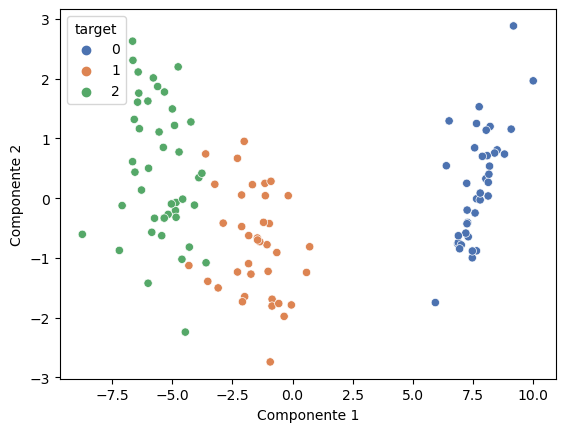

In [8]:
x_plot = pd.DataFrame(x_train_lda, columns=["Componente 1", "Componente 2"], index=x_plot.index)
x_plot["y"] = 0
x_plot["target"] = y_train

sns.scatterplot(x= "Componente 1", y="Componente 2", data=x_plot, hue="target", palette="deep")
plt.show()

### LDA de 1 componente

In [28]:
lda = LDA(n_components=1)
x_train_lda = lda.fit_transform(x_train, y_train)
x_test_lda = lda.transform(x_test)

In [29]:
lda.explained_variance_ratio_

array([0.9911804])

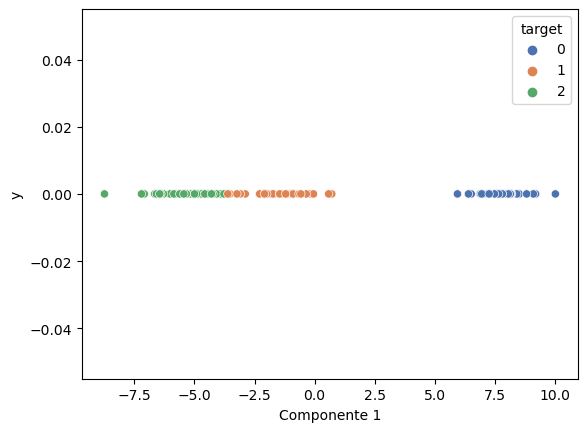

In [30]:
x_plot = pd.DataFrame(x_train_lda, columns=["Componente 1"], index=x_plot.index)
x_plot["y"] = 0
x_plot["target"] = y_train

sns.scatterplot(x= "Componente 1", y="y", data=x_plot, hue="target", palette="deep")
plt.show()

In [31]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train_lda, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [32]:
y_pred = clf.predict(x_test_lda)

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

